<a href="https://colab.research.google.com/github/Gvelecico/chicago-traffic-crash-analysis/blob/main/Chicago_Traffic_Crashes_Chicago_Police_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libaries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/anoopjohny/traffic-crashes-crashes/data

# Importing dataset

In [3]:
raw_df = pd.read_csv("/content/drive/MyDrive/Python/datasets/Traffic_Crashes_-_Crashes.csv")


# Reading dataset

In [4]:
raw_df.head(5)
#raw_df.tail(5)

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [6]:
#raw_df.info()
#raw_df['CRASH_DATE_EST_I'].isna().sum()
raw_df.drop('CRASH_DATE_EST_I', axis=1, inplace=True)

In [7]:
raw_df['YEAR'] = pd.to_datetime(raw_df['CRASH_DATE']).dt.year
raw_df['YEAR'] =raw_df['YEAR'].astype(int)
#raw_df.head(5)
raw_df['YEAR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 794956 entries, 0 to 794955
Series name: YEAR
Non-Null Count   Dtype
--------------   -----
794956 non-null  int64
dtypes: int64(1)
memory usage: 6.1 MB


In [8]:
year_counts = raw_df['YEAR'].value_counts().reset_index()
year_counts.columns = ['year', 'count']
year_counts.head(5)

,year,count
0,2018,118950
1,2019,117762
2,2023,110560
3,2021,108763
4,2022,108401


In [5]:
weather_df = raw_df.groupby([ 'WEATHER_CONDITION']).agg({'YEAR': 'count'}).reset_index()
weather_df

KeyError: "Column(s) ['YEAR'] do not exist"

In [ ]:
#weather_df['WEATHER_CONDITION'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
794951    False
794952    False
794953    False
794954    False
794955    False
Name: WEATHER_CONDITION, Length: 794956, dtype: bool

In [ ]:
weather_df.to_csv('/content/drive/MyDrive/Python/datasets/conditions.csv', index=False)

In [2]:
weather_df = pd.read_csv('/content/drive/MyDrive/Python/datasets/conditions.csv')

In [5]:
weather_df.head(5)

,WEATHER_CONDITION,YEAR
0,"BLOWING SAND, SOIL, DIRT",7
1,BLOWING SNOW,404
2,CLEAR,624964
3,CLOUDY/OVERCAST,23458
4,FOG/SMOKE/HAZE,1222


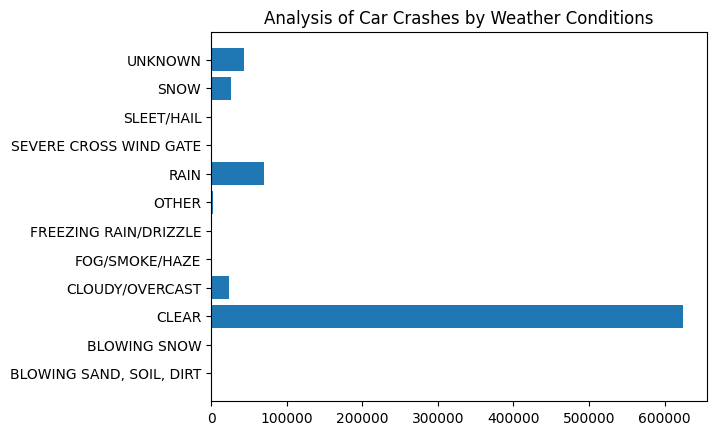

In [6]:

plt.barh(weather_df["WEATHER_CONDITION"], weather_df['YEAR'])
plt.title('Analysis of Car Crashes by Weather Conditions')
plt.show()